In [4]:
import pickle
import sys
sys.path.append("../src/")
from plot_simulation_results import *

In [5]:
from utils import read_pickles

In [6]:
import matplotlib.patches as mpatches

In [7]:
def add_label(violin, label, labels):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

In [8]:
import matplotlib.ticker as ticker

In [9]:
import matplotlib_defaults

# Single dataset simultaneous update violin plots

In [ ]:
results_path = "../results/"
dataset_name = "email-Enron"
seed_vals = np.array([1, 5, 10, 15, 20, 100, 500, 1000])#, 10000, 20000, 50000, 100000])
results_prefix = f"{results_path}{dataset_name}/{dataset_name}"
params_dict = {
    "steps": 50,
    "threshold": 1,
    "seeding_strategy": "edge",
    "runs": 50,
    "selection": "simultaneous"
}

In [ ]:
title_mapping = {"subface": "Non-Strict Encapsulation", "subface-strict": "Strict Encapsulation"}
filename_mapping = {"subface": "encapsulation", "subface-strict": "encapsulation-strict"}

In [ ]:
key = "edges_activated"
norm_type = "total"
params_dict["layer_randomization"] = True
for threshold in [1]:
    params_dict["threshold"] = threshold
    for step in [25]:
        for update in ["subface", "subface-strict", "encapsulation-all"]:
            params_dict["update"] = update
            fig, axs = plt.subplots(1, 2, figsize=(10,5), squeeze=False, sharey=True)
            labels = []
            for biased_seed in ["uniform", "size_biased", "inverse_size", "smallest_first"]:
            #for biased_seed in ["uniform", "degree_biased", "inverse_degree", "biased_seed", "inverse_biased_seed"]:
            #for biased_seed in ["size_biased", "dag_components"]:
                params_dict["seed_funct"] = biased_seed
                activations_data = {"obs": [],
                                "rnd": []
                               }
                for num_seeds in seed_vals:
                    params_dict["ia"] = num_seeds
                    output_obs, output_rnd = read_pickles(results_prefix, params_dict=params_dict, random_nums=[0])
                    obs_norm = rnd_norm = 1
                    if norm_type == "total":
                        obs_norm = output_obs["total_edges"]
                        rnd_norm = output_rnd["total_edges"]
                    elif norm_type == "max":
                        obs_norm = output_obs[key].cumsum(axis=1).max()
                        rnd_norm = output_rnd[key].cumsum(axis=1).max()
                    activations_data["obs"].append((output_obs[key].cumsum(axis=1)[:, step]) / obs_norm)

                    activations_data["rnd"].append((output_rnd[key].cumsum(axis=1)[:, step]) / rnd_norm)



                row = col = 0

                v = axs[row][col].violinplot(activations_data["obs"], positions=range(len(seed_vals)),
                                            showmeans=False)


                add_label(v, biased_seed, labels)

                col = 1

                v = axs[row][col].violinplot(activations_data["rnd"], positions=range(len(seed_vals)),
                                            showmeans=False)

            axs[row][0].legend(*zip(*labels), loc="upper left")

            titles = {0: "Observed", 1:"Layer Randomization"}
            for col in [0, 1]:
                axs[row][col].set(
                    xlabel = "Number of Seeds",
                    ylabel = key,
                    title = titles[col],
                    #
                )
                if norm_type != "none":
                    axs[row][col].set_ylim((-0.02, 1.02))

                axs[row][col].xaxis.set_major_locator(ticker.FixedLocator(range(len(seed_vals))))
                axs[row][col].set_xticklabels(seed_vals, rotation=45)
                if col == 0:
                    y = seed_vals / output_obs["total_edges"]
                else:
                    y = seed_vals / output_rnd["total_edges"]
                axs[row][col].plot(range(len(seed_vals)), y, marker='o', alpha=0.3, color="black")
                axs[row][col].spines['top'].set_visible(False)
                axs[row][col].spines['right'].set_visible(False)
            
            update_name = update
            if update in title_mapping:
                update_name = title_mapping[update]
            
            fig.suptitle(f"{dataset_name}, {update_name} dynamics, {step} steps")
            fig.subplots_adjust(wspace=0.3)
            #fig.tight_layout()
            
            update_filename = update
            if update in filename_mapping:
                update_name = filename_mapping[update]
                
            #fig.savefig(f"../results/plots/simultaneous-seed-simulations/{dataset_name}_seed_simulation_{update_name}.pdf", bbox_inches="tight")

# All datasets violin plots

In [ ]:
results_path = "../results/"
#seed_vals = np.array([1, 5, 10, 15, 20, 100, 1000, 10000, 20000, 50000, 100000])
seed_vals = np.array([10, 100, 500, 1000, 10000, 20000, 50000, 100000])
params_dict = {
    "threshold": 1,
    "seeding_strategy": "edge",
    "selection": "simultaneous"
}
key = "edges_activated"
norm_type = "total"
params_dict["layer_randomization"] = True
threshold = 1
params_dict["threshold"] = threshold
step = 25
update = "subface"
params_dict["update"] = update

In [ ]:
datasets = [
    ("coauth-DBLP", 25, 25, 100_000),
    ("coauth-MAG-Geology", 50, 50, 100_000),
    ("coauth-MAG-History", 50, 50, 100_000),
    ("contact-high-school", 25, 25, 1000),
    ("contact-primary-school", 25, 25, 10000),
    ("email-Enron", 50, 50, 1000),
    ("email-Eu", 50, 50, 20000)
]

fig = plt.figure(figsize=(15,5))
gridsize = (2, len(datasets))

col_idx = 0
for dataset_name, steps, runs, max_seed in datasets:
    results_prefix = f"{results_path}{dataset_name}/{dataset_name}"
    params_dict["steps"] = steps
    params_dict["runs"] = runs
    curr_seed_vals = seed_vals[seed_vals <= max_seed]
    curr_seed_vals = seed_vals[seed_vals <= max_seed]
    if dataset_name == "coauth-DBLP":
        curr_seed_vals = curr_seed_vals[curr_seed_vals != 500]
    ax1 = plt.subplot2grid(gridsize, (0,col_idx))
    ax2 = plt.subplot2grid(gridsize, (1,col_idx))
    labels = []
    for biased_seed in ["uniform", "size_biased", "inverse_size", "smallest_first"]:
        params_dict["seed_funct"] = biased_seed
        activations_data = {"obs": [],
                        "rnd": []
                       }
        for num_seeds in curr_seed_vals:
            params_dict["ia"] = num_seeds
            output_obs, output_rnd = read_pickles(results_prefix, params_dict=params_dict, random_nums=[0])
            obs_norm = rnd_norm = 1
            if norm_type == "total":
                obs_norm = output_obs["total_edges"]
                rnd_norm = output_rnd["total_edges"]
            elif norm_type == "max":
                obs_norm = output_obs[key].cumsum(axis=1).max()
                rnd_norm = output_rnd[key].cumsum(axis=1).max()
            activations_data["obs"].append((output_obs[key].cumsum(axis=1)[:, step]) / obs_norm)

            activations_data["rnd"].append((output_rnd[key].cumsum(axis=1)[:, step]) / rnd_norm)



        ax1.set_title(dataset_name, fontsize=11)
        #ax.set(xlabel=r"$n$", yscale='log', ylim=(10**-1, 10**7))
        v = ax1.violinplot(activations_data["obs"], positions=range(len(curr_seed_vals)),
                                    showmeans=False)
        add_label(v, biased_seed, labels)
        v = ax2.violinplot(activations_data["rnd"], positions=range(len(curr_seed_vals)),
                                    showmeans=False)


    if col_idx == 0:
        ax1.legend(*zip(*labels), ncols=len(datasets), bbox_to_anchor=(2.0,-2.35), loc="upper left", frameon=False)

    for idx, ax in enumerate([ax1, ax2]):
        if col_idx == 0:
            ax.set_ylabel("Edges Activated") 

        if norm_type != "none":
            ax.set_ylim((-0.02, 1.02))

        ax.xaxis.set_major_locator(ticker.FixedLocator(range(len(curr_seed_vals))))
       
        if idx == 0:
            y = curr_seed_vals / output_obs["total_edges"]
            ax.set_xticklabels(curr_seed_vals, rotation=90, size=10)
        else:
            y = curr_seed_vals / output_rnd["total_edges"]
            ax.set_xticklabels(curr_seed_vals, rotation=90, size=10)
       
        ax.plot(range(len(curr_seed_vals)), y, marker='o', alpha=0.3, color="black")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    col_idx += 1
    
fig.subplots_adjust(wspace=0.4, hspace=0.5)
update_name = update
if update in title_mapping:
    update_name = title_mapping[update]
fig.suptitle(f"{update_name} dynamics, {step} steps")
fig.supxlabel("# Seeds", size=15, y=-0.13)

fig.savefig(f"../results/plots/simultaneous-seed-simulations/seed_simulation_{update}_violins_all.pdf", bbox_inches="tight")

# All datasets two row scatter plots

In [ ]:
datasets = [
    ("coauth-DBLP", 25, 25, 100_000),
    ("coauth-MAG-Geology", 50, 50, 100_000),
    ("coauth-MAG-History", 50, 50, 100_000),
    ("contact-high-school", 25, 25, 1000),
    ("contact-primary-school", 25, 25, 10000),
    ("email-Enron", 50, 50, 1000),
    ("email-Eu", 50, 50, 20000)
]

fig = plt.figure(figsize=(15,5))
gridsize = (2, len(datasets))

col_idx = 0
for dataset_name, steps, runs, max_seed in datasets:
    results_prefix = f"{results_path}{dataset_name}/{dataset_name}"
    params_dict["steps"] = steps
    params_dict["runs"] = runs
    curr_seed_vals = seed_vals[seed_vals <= max_seed]
    curr_seed_vals = seed_vals[seed_vals <= max_seed]
    if dataset_name == "coauth-DBLP":
        curr_seed_vals = curr_seed_vals[curr_seed_vals != 500]
    ax1 = plt.subplot2grid(gridsize, (0,col_idx))
    ax2 = plt.subplot2grid(gridsize, (1,col_idx))
    labels = []
    for biased_seed in ["uniform", "size_biased", "inverse_size", "smallest_first"]:
        params_dict["seed_funct"] = biased_seed
        activations_data = {
            "obs": [],
            "obs_std":[],
            "rnd": [],
            "rnd_std":[]
        }
        for num_seeds in curr_seed_vals:
            params_dict["ia"] = num_seeds
            output_obs, output_rnd = read_pickles(results_prefix, params_dict=params_dict, random_nums=[0])
            obs_norm = rnd_norm = 1
            if norm_type == "total":
                obs_norm = output_obs["total_edges"]
                rnd_norm = output_rnd["total_edges"]
            elif norm_type == "max":
                obs_norm = output_obs[key].cumsum(axis=1).max()
                rnd_norm = output_rnd[key].cumsum(axis=1).max()
            activations_data["obs"].append(((output_obs[key].cumsum(axis=1)[:, step]) / obs_norm).mean())
            activations_data["obs_std"].append(((output_obs[key].cumsum(axis=1)[:, step]) / obs_norm).std())

            activations_data["rnd"].append(((output_rnd[key].cumsum(axis=1)[:, step]) / rnd_norm).mean())
            activations_data["rnd_std"].append(((output_rnd[key].cumsum(axis=1)[:, step]) / rnd_norm).std())



        ax1.set_title(dataset_name, fontsize=11)
        #ax.set(xlabel=r"$n$", yscale='log', ylim=(10**-1, 10**7))
        v = ax1.errorbar(curr_seed_vals, activations_data["obs"], yerr=activations_data["obs_std"],
                         marker="o",
                         alpha=0.7,
                         label=biased_seed)
        #add_label(v, biased_seed, labels)
        ax2.errorbar(curr_seed_vals, activations_data["rnd"], yerr=activations_data["rnd_std"],
                     marker="^",
                     linestyle='--',
                     alpha=0.5,
                     color=v[0].get_markerfacecolor())


    if col_idx == 0:
        ax1.legend(ncols=len(datasets), bbox_to_anchor=(2.0,-2.35), loc="upper left", frameon=False)

    if col_idx == 0:
        ax1.set_ylabel("Edges Activated") 
        ax2.set_ylabel("Edges Activated")

    if norm_type != "none":
        ax1.set_ylim((-0.02, 1.02))
        ax2.set_ylim((-0.02, 1.02))

    for idx, ax in enumerate([ax1, ax2]):
        if idx == 0:
            y = curr_seed_vals / output_obs["total_edges"]
            #ax.set_xticklabels(curr_seed_vals, rotation=90, size=10)
        else:
            y = curr_seed_vals / output_rnd["total_edges"]
            #ax.set_xticklabels(curr_seed_vals, rotation=90, size=10)
       
        ax.plot(curr_seed_vals, y, marker='o', alpha=0.3, color="black")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set(xscale='log')
    col_idx += 1
    
fig.subplots_adjust(wspace=0.4, hspace=0.5)
update_name = update
if update in title_mapping:
    update_name = title_mapping[update]
fig.suptitle(f"{update_name} dynamics, {step} steps")
fig.supxlabel("# Seeds", size=15, y=-0.13)

fig.savefig(f"../results/plots/simultaneous-seed-simulations/seed_simulation_{update}_all.pdf", bbox_inches="tight")

# All datasets single row version

In [ ]:
datasets = [
    ("coauth-DBLP", 25, 25, 100_000),
    ("coauth-MAG-Geology", 50, 50, 100_000),
    ("coauth-MAG-History", 50, 50, 100_000),
    ("contact-high-school", 25, 25, 1000),
    ("contact-primary-school", 25, 25, 10000),
    ("email-Enron", 50, 50, 1000),
    ("email-Eu", 50, 50, 20000)
]

fig = plt.figure(figsize=(15,3))
gridsize = (1, len(datasets))

col_idx = 0
for dataset_name, steps, runs, max_seed in datasets:
    results_prefix = f"{results_path}{dataset_name}/{dataset_name}"
    params_dict["steps"] = steps
    params_dict["runs"] = runs
    curr_seed_vals = seed_vals[seed_vals <= max_seed]
    if dataset_name == "coauth-DBLP":
        curr_seed_vals = curr_seed_vals[curr_seed_vals != 500]
        
    ax1 = plt.subplot2grid(gridsize, (0,col_idx))
    labels = []
    for biased_seed in ["uniform", "size_biased", "inverse_size", "smallest_first"]:
        params_dict["seed_funct"] = biased_seed
        activations_data = {
            "obs": [],
            "obs_std":[],
            "rnd": [],
            "rnd_std":[]
        }
        for num_seeds in curr_seed_vals:
            params_dict["ia"] = num_seeds
            output_obs, output_rnd = read_pickles(results_prefix, params_dict=params_dict, random_nums=[0])
            obs_norm = rnd_norm = 1
            if norm_type == "total":
                obs_norm = output_obs["total_edges"]
                rnd_norm = output_rnd["total_edges"]
            elif norm_type == "max":
                obs_norm = output_obs[key].cumsum(axis=1).max()
                rnd_norm = output_rnd[key].cumsum(axis=1).max()
            activations_data["obs"].append(((output_obs[key].cumsum(axis=1)[:, step]) / obs_norm).mean())
            activations_data["obs_std"].append(((output_obs[key].cumsum(axis=1)[:, step]) / obs_norm).std())

            activations_data["rnd"].append(((output_rnd[key].cumsum(axis=1)[:, step]) / rnd_norm).mean())
            activations_data["rnd_std"].append(((output_rnd[key].cumsum(axis=1)[:, step]) / rnd_norm).std())



        ax1.set_title(dataset_name, fontsize=11)
        #ax.set(xlabel=r"$n$", yscale='log', ylim=(10**-1, 10**7))
        v = ax1.errorbar(curr_seed_vals, activations_data["obs"], yerr=activations_data["obs_std"],
                         marker="o",
                         alpha=0.7,
                         label=biased_seed)
        #add_label(v, biased_seed, labels)
        ax1.errorbar(curr_seed_vals, activations_data["rnd"], yerr=activations_data["rnd_std"],
                     marker="^",
                     linestyle='--',
                     alpha=0.5,
                     color=v[0].get_markerfacecolor())


    if col_idx == 0:
        ax1.legend(ncols=len(datasets), bbox_to_anchor=(2.0,-0.5), loc="upper left", frameon=False)

    if col_idx == 0:
        ax1.set_ylabel("Edges Activated") 

    if norm_type != "none":
        ax1.set_ylim((-0.02, 1.02))

    y = curr_seed_vals / output_obs["total_edges"]

    ax1.plot(curr_seed_vals, y, marker='o', alpha=0.5, color="black")
    ax1.set(xscale="log")
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
        
    col_idx += 1
    
fig.subplots_adjust(wspace=0.4)
update_name = update
if update in title_mapping:
    update_name = title_mapping[update]
fig.suptitle(f"{update_name} dynamics, {step} steps", y=1.1)
fig.supxlabel("# Seeds", size=15, y=-0.19)

fig.savefig(f"../results/plots/simultaneous-seed-simulations/seed_simulation_{update}_onerow.pdf", bbox_inches="tight")

# All datasets single row ratio version

In [ ]:
results_path = "../results/"
#seed_vals = np.array([1, 5, 10, 15, 20, 100, 1000, 10000, 20000, 50000, 100000])
seed_vals = np.array([10, 100, 500, 1000, 10000, 20000, 50000, 100000])
params_dict = {
    "threshold": 1,
    "seeding_strategy": "edge",
    "selection": "simultaneous"
}
key = "edges_activated"
norm_type = "total"
params_dict["layer_randomization"] = True
threshold = 1
params_dict["threshold"] = threshold
step = 25
update = "subface"
params_dict["update"] = update

In [ ]:
datasets = [
    ("coauth-DBLP", 25, 25, 100_000),
    ("coauth-MAG-Geology", 50, 50, 100_000),
    ("coauth-MAG-History", 50, 50, 100_000),
    ("contact-high-school", 25, 25, 1000),
    ("contact-primary-school", 25, 25, 10000),
    ("email-Enron", 50, 50, 1000),
    ("email-Eu", 50, 50, 20000)
]

fig = plt.figure(figsize=(15,3))
gridsize = (1, len(datasets))

col_idx = 0
for dataset_name, steps, runs, max_seed in datasets:
    results_prefix = f"{results_path}{dataset_name}/{dataset_name}"
    params_dict["steps"] = steps
    params_dict["runs"] = runs
    curr_seed_vals = seed_vals[seed_vals <= max_seed]
    if dataset_name == "coauth-DBLP":
        curr_seed_vals = curr_seed_vals[curr_seed_vals != 500]
        
    ax1 = plt.subplot2grid(gridsize, (0,col_idx))
    labels = []
    for biased_seed in ["uniform", "size_biased", "inverse_size", "smallest_first"]:
        params_dict["seed_funct"] = biased_seed
        activations_data = {
            "obs": [],
            "obs_std":[],
            "rnd": [],
            "rnd_std":[]
        }
        for num_seeds in curr_seed_vals:
            params_dict["ia"] = num_seeds
            output_obs, output_rnd = read_pickles(results_prefix, params_dict=params_dict, random_nums=[0])
            obs_norm = rnd_norm = 1
            if norm_type == "total":
                obs_norm = output_obs["total_edges"]
                rnd_norm = output_rnd["total_edges"]
            elif norm_type == "max":
                obs_norm = output_obs[key].cumsum(axis=1).max()
                rnd_norm = output_rnd[key].cumsum(axis=1).max()
            activations_data["obs"].append(((output_obs[key].cumsum(axis=1)[:, step]) / obs_norm).mean())
            activations_data["obs_std"].append(((output_obs[key].cumsum(axis=1)[:, step]) / obs_norm).std())

            activations_data["rnd"].append(((output_rnd[key].cumsum(axis=1)[:, step]) / rnd_norm).mean())
            activations_data["rnd_std"].append(((output_rnd[key].cumsum(axis=1)[:, step]) / rnd_norm).std())



        ax1.set_title(dataset_name, fontsize=11)
        #ax.set(xlabel=r"$n$", yscale='log', ylim=(10**-1, 10**7))
        v = ax1.plot(curr_seed_vals, np.array(activations_data["obs"]) / np.array(activations_data["rnd"]),
                         marker="o",
                         alpha=0.7,
                         label=biased_seed)
        #add_label(v, biased_seed, labels)
        #ax1.errorbar(curr_seed_vals, activations_data["rnd"], yerr=activations_data["rnd_std"],
        #             marker="^",
        #             linestyle='--',
        #             alpha=0.5,
        #             color=v[0].get_markerfacecolor())


    #if col_idx == 0:
    #    ax1.legend(ncols=len(datasets), bbox_to_anchor=(2.0,-0.4), loc="upper left", frameon=False)

    if col_idx == 0:
        ax1.set_ylabel(r"$\frac{\mathrm{obs}}{\mathrm{rnd}}$ Edges Activated") 

    #if norm_type != "none":
        #ax1.set_ylim((-0.02, 1.02))

    #y = curr_seed_vals / output_obs["total_edges"]
    #ax1.plot(curr_seed_vals, y, marker='o', alpha=0.5, color="black")
    ax1.hlines(1.0, 1, max(curr_seed_vals),  linestyles='--', alpha=0.5, color="black")
    xticks = [10**i for i in range(1, int(max(np.log10(curr_seed_vals))+1))]
    if len(xticks) > 3:
        xticks = [10**i for i in range(1, int(max(np.log10(curr_seed_vals))+1), 2)]
    ax1.set(xscale="log", xticks=xticks)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
        
    col_idx += 1
    
fig.subplots_adjust(wspace=0.4)
update_name = update
if update in title_mapping:
    update_name = title_mapping[update]
fig.suptitle(f"{update_name} Dynamics, {step} Steps", y=1.1)
fig.supxlabel("# Seeds", size=15, y=-0.15)
update_filename = update
if update in filename_mapping:
    update_name = filename_mapping[update]
fig.savefig(f"../results/plots/simultaneous-seed-simulations/seed_simulation_{update_name}_ratios.pdf", bbox_inches="tight")

# Two row: plots then ratios 

In [1]:
title_mapping = {"subface": "Non-Strict Encapsulation",
                 "subface-strict": "Strict Encapsulation",
                 "encapsulation-immediate-strict": "Encapsulation Strict",
                  "encapsulation-immediate": "Encapsulation Non-strict",
                "encapsulation-empirical-strict": "Empirical Encapsulation"}
filename_mapping = {"subface": "encapsulation", "subface-strict": "encapsulation-strict",  "encapsulation-all": "encapsulation-all"}

In [2]:
results_path = "../results/"
params_dict = {
    "seeding_strategy": "edge",
    "selection": "simultaneous",
    "layer_randomization": True
}
key = "edges_activated"
step = 25

Exception: [Errno 2] No such file or directory: '../results/coauth-MAG-Geology/coauth-MAG-Geology_simultaneous_encapsulation-immediate_steps-50_t-1_ia-1_runs-50_edge_uniform.pickle'
Exception: [Errno 2] No such file or directory: '../results/coauth-MAG-Geology/coauth-MAG-Geology_layer_randomization_simultaneous_encapsulation-immediate_steps-50_t-1_ia-1_runs-50_edge_uniform.pickle'


TypeError: 'NoneType' object is not subscriptable

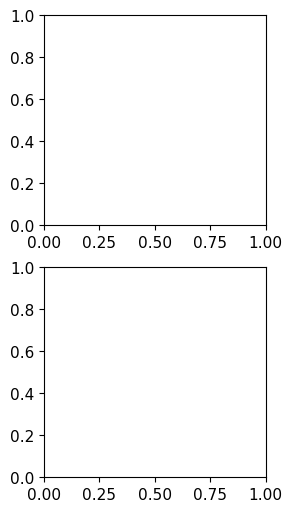

In [10]:
datasets = [
    #("coauth-DBLP", 25, 25, 100_000),
    ("coauth-MAG-Geology", 50, 50, 500_000),
    ("coauth-MAG-History", 50, 50, 100_000),
    ("contact-high-school", 25, 25, 5000),
    ("contact-primary-school", 25, 25, 10000),
    ("email-Enron", 50, 50, 1000),
    ("email-Eu", 50, 50, 20000)
]

params_dict["threshold"] = "all"
normalize = True
seed_vals = np.array([1, 10, 100, 1000, 5000, 10000, 20000, 50000, 100000, 500000])

for thresh in [1, "all"]:
    params_dict["threshold"] = thresh
    for update in ["encapsulation-immediate", "encapsulation-empirical", "encapsulation-immediate-strict", "encapsulation-empirical-strict"]:
    #for update in ["encapsulation-empirical-strict"]:
        params_dict["update"] = update

        fig = plt.figure(figsize=(20,6))
        gridsize = (2, len(datasets))

        col_idx = 0
        for dataset_name, steps, runs, max_seed in datasets:
            results_prefix = f"{results_path}{dataset_name}/{dataset_name}"
            params_dict["steps"] = steps
            params_dict["runs"] = runs
            curr_seed_vals = seed_vals[seed_vals <= max_seed]
            if dataset_name == "coauth-DBLP":
                curr_seed_vals = curr_seed_vals[curr_seed_vals != 500]

            ax1 = plt.subplot2grid(gridsize, (0, col_idx))
            ax2 = plt.subplot2grid(gridsize, (1, col_idx))
            labels = []
            for biased_seed in ["uniform", "size_biased", "inverse_size", "smallest_first"]:
                params_dict["seed_funct"] = biased_seed
                activations_data = {
                    "obs": [],
                    "obs_std":[],
                    "rnd": [],
                    "rnd_std":[],
                    "obs_nonorm": [],
                    "rnd_nonorm": []
                }
                for num_seeds in curr_seed_vals:
                    params_dict["ia"] = num_seeds
                    output_obs, output_rnd = read_pickles(results_prefix, params_dict=params_dict)
                    obs_norm = rnd_norm = 1
                    obs = output_obs[key].cumsum(axis=1)[:, step]
                    rnd = output_rnd[key].cumsum(axis=1)[:, step]
                    obs -= num_seeds
                    rnd -= num_seeds
                    activations_data["obs_nonorm"].append(obs.mean())
                    activations_data["rnd_nonorm"].append(rnd.mean())
                    obs_norm = output_obs["total_edges"] - num_seeds
                    rnd_norm = output_rnd["total_edges"] - num_seeds

                    if not normalize:
                        activations_data["obs"].append((obs).mean())
                        activations_data["obs_std"].append((obs).std())

                        activations_data["rnd"].append((rnd).mean())
                        activations_data["rnd_std"].append((rnd).std())
                    else:
                        activations_data["obs"].append((obs / obs_norm).mean())
                        activations_data["obs_std"].append((obs / obs_norm).std())

                        activations_data["rnd"].append((rnd / rnd_norm).mean())
                        activations_data["rnd_std"].append((rnd / rnd_norm).std())



                ax1.set_title(dataset_name, fontsize=14)
                v = ax1.errorbar(curr_seed_vals, activations_data["obs"], yerr=activations_data["obs_std"],
                                 marker="o",
                                 alpha=0.7,
                                 label=biased_seed)
                #add_label(v, biased_seed, labels)
                ax1.errorbar(curr_seed_vals, activations_data["rnd"], yerr=activations_data["rnd_std"],
                             marker="^",
                             linestyle='--',
                             alpha=0.5,
                             color=v[0].get_markerfacecolor())

                ax2.plot(curr_seed_vals, np.array(activations_data["obs"]) - np.array(activations_data["rnd"]),
                                 marker="o",
                                 alpha=0.7,
                                 label=biased_seed)

            if col_idx == 0:
                ax1.legend(ncols=4, bbox_to_anchor=(2.75,-1.8), loc="upper left", frameon=False)

            if col_idx == 0:
                ax1.set_ylabel("Edges Activated") 
                ax2.set_ylabel(r"Observed - Random") 

            #if norm_type != "none":
            #    ax1.set_ylim((-0.02, 1.02))

            ax2.hlines(0.0, 1, max(curr_seed_vals),  linestyles='--', alpha=0.5, color="black")
            #ax2.set_ylim(0.5, 7)
            xticks = [10**i for i in range(0, int(max(np.log10(curr_seed_vals))+1))]
            #if len(xticks) > 3:
            #    xticks = [10**i for i in range(0, int(max(np.log10(curr_seed_vals))+1), 2)]

            ax1.set_ylim(-0.1, 1.1)
            ax1.hlines(1.0, 1, max(curr_seed_vals), color="black", alpha=0.3, linestyle="--")
            ax2.set_ylim(-0.1, 0.7)
            for ax in [ax1, ax2]:
                ax.set(xscale="log", xticks=xticks)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)

            #y = curr_seed_vals / output_obs["total_edges"]
            #ax1.plot(curr_seed_vals, y, marker='o', alpha=0.5, color="black")
            col_idx += 1

        fig.subplots_adjust(wspace=0.5, hspace=0.2)
        title = update
        if update in title_mapping:
            title = title_mapping[update]

        fig.supxlabel("# Seeds", size=15, y=-0.05)
        
        filename = update
        if update in filename_mapping:
            filename = filename_mapping[update]

        if update != "down":
            fig.suptitle(fr"{title} Dynamics, {step} steps, $\tau=${params_dict['threshold']}", y=1)
            #fig.savefig(f"../results/plots/simultaneous-seed-simulations/seed_simulation_{filename}_{params_dict['threshold']}_combo.pdf", bbox_inches="tight")
        else:
            fig.suptitle(fr"Threshold Dynamics, {step} steps, $\tau={params_dict['threshold']}$", y=1)
            #fig.savefig(f"../results/plots/simultaneous-seed-simulations/seed_simulation_{filename}_{params_dict['threshold']}_combo.pdf", bbox_inches="tight")